Deep Learning Models -- A collection of various deep learning architectures, models, and tips for TensorFlow and PyTorch in Jupyter Notebooks.
- Author: Sebastian Raschka
- GitHub Repository: https://github.com/rasbt/deeplearning-models

---

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch

Author: Sebastian Raschka

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.21.0

torch: 1.8.1+cu111



# MobileNet-v3 (small) trained on Cifar-10

## Imports

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, "..") # to include ../helper_evaluate.py etc.

# From local helper files
from helper_utils import set_all_seeds, set_deterministic
from helper_evaluate import compute_confusion_matrix, compute_accuracy
from helper_train import train_classifier_simple_v2
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_data import get_dataloaders_cifar10, UnNormalize

## Settings and Dataset

In [4]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 128
NUM_EPOCHS = 150
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [6]:
##########################
### CIFAR-10 DATASET
##########################

### Note: Network trains about 2-3x faster if you don't
# resize (keeping the orig. 32x32 res.)
# Test acc. I got via the 32x32 was lower though; ~77%

train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((70, 70)),
    torchvision.transforms.RandomCrop((64, 64)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((70, 70)),        
    torchvision.transforms.CenterCrop((64, 64)),            
    torchvision.transforms.ToTensor(),                
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_loader, valid_loader, test_loader = get_dataloaders_cifar10(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Files already downloaded and verified
Image batch dimensions: torch.Size([128, 3, 64, 64])
Image label dimensions: torch.Size([128])
Class labels of 10 examples: tensor([4, 7, 4, 6, 2, 6, 9, 7, 3, 0])


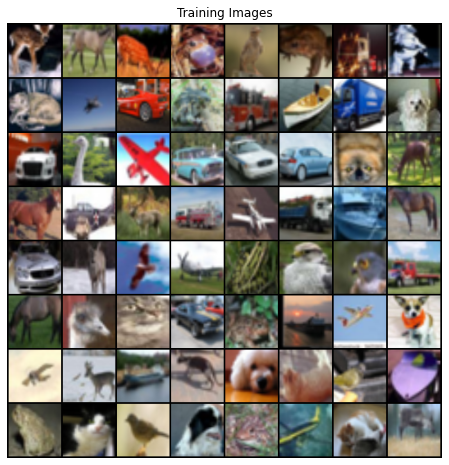

In [7]:
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:64], 
                                         padding=2, normalize=True),
                        (1, 2, 0)))

## Model

In [8]:
##########################
### MODEL
##########################


model = torch.hub.load('pytorch/vision:v0.9.0', 'mobilenet_v3_small',
                       pretrained=False)

model.classifier[-1] = torch.nn.Linear(in_features=1024, # as in original
                                       out_features=10) # number of class labels in Cifar-10)

model = model.to(DEVICE)

Using cache found in /home/raschka/.cache/torch/hub/pytorch_vision_v0.9.0


In [9]:
##########################
### MODEL
##########################


model = torch.hub.load('pytorch/vision:v0.9.0', 'mobilenet_v2',
                       pretrained=False)

model.classifier[-1] = torch.nn.Linear(in_features=1280, # as in original
                                       out_features=10) # number of class labels in Cifar-10)

model = model.to(DEVICE)

Using cache found in /home/raschka/.cache/torch/hub/pytorch_vision_v0.9.0


Epoch: 001/150 | Batch 0000/0351 | Loss: 2.3692
Epoch: 001/150 | Batch 0100/0351 | Loss: 1.7399
Epoch: 001/150 | Batch 0200/0351 | Loss: 1.7337
Epoch: 001/150 | Batch 0300/0351 | Loss: 1.8543
Epoch: 001/150 | Train: 35.07% | Validation: 35.82% | Best Validation (Ep. 001): 35.82%
Time elapsed: 0.86 min
Epoch: 002/150 | Batch 0000/0351 | Loss: 1.6504
Epoch: 002/150 | Batch 0100/0351 | Loss: 1.6998
Epoch: 002/150 | Batch 0200/0351 | Loss: 1.6812
Epoch: 002/150 | Batch 0300/0351 | Loss: 1.6049
Epoch: 002/150 | Train: 43.60% | Validation: 43.74% | Best Validation (Ep. 002): 43.74%
Time elapsed: 1.72 min
Epoch: 003/150 | Batch 0000/0351 | Loss: 1.5176
Epoch: 003/150 | Batch 0100/0351 | Loss: 1.6701
Epoch: 003/150 | Batch 0200/0351 | Loss: 1.4299
Epoch: 003/150 | Batch 0300/0351 | Loss: 1.2884
Epoch: 003/150 | Train: 51.53% | Validation: 51.28% | Best Validation (Ep. 003): 51.28%
Time elapsed: 2.58 min
Epoch: 004/150 | Batch 0000/0351 | Loss: 1.1913
Epoch: 004/150 | Batch 0100/0351 | Loss: 1.

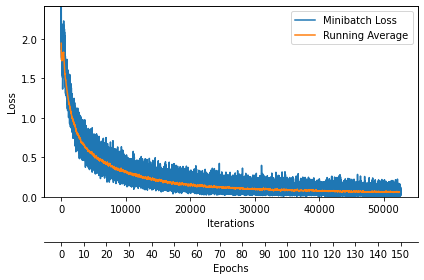

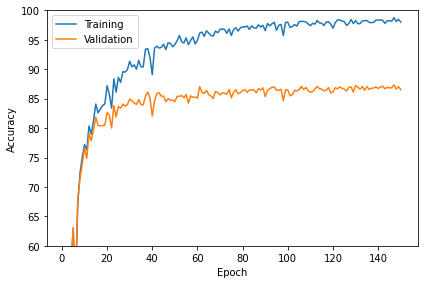

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

minibatch_loss_list, train_acc_list, valid_acc_list = train_classifier_simple_v2(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    best_model_save_path='mobilenet-v2-best-1.pt',
    device=DEVICE,
    scheduler_on='valid_acc',
    logging_interval=100)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

In [11]:
model.load_state_dict(torch.load('mobilenet-v2-best-1.pt'))
model.eval()
test_acc = compute_accuracy(model, test_loader, device=DEVICE)
print(f'Test accuracy: {test_acc:.2f}%')

RuntimeError: Error(s) in loading state_dict for MobileNetV2:
	Missing key(s) in state_dict: "features.1.conv.0.0.weight", "features.1.conv.0.1.weight", "features.1.conv.0.1.bias", "features.1.conv.0.1.running_mean", "features.1.conv.0.1.running_var", "features.1.conv.1.weight", "features.1.conv.2.weight", "features.1.conv.2.bias", "features.1.conv.2.running_mean", "features.1.conv.2.running_var", "features.2.conv.0.0.weight", "features.2.conv.0.1.weight", "features.2.conv.0.1.bias", "features.2.conv.0.1.running_mean", "features.2.conv.0.1.running_var", "features.2.conv.1.0.weight", "features.2.conv.1.1.weight", "features.2.conv.1.1.bias", "features.2.conv.1.1.running_mean", "features.2.conv.1.1.running_var", "features.2.conv.2.weight", "features.2.conv.3.weight", "features.2.conv.3.bias", "features.2.conv.3.running_mean", "features.2.conv.3.running_var", "features.3.conv.0.0.weight", "features.3.conv.0.1.weight", "features.3.conv.0.1.bias", "features.3.conv.0.1.running_mean", "features.3.conv.0.1.running_var", "features.3.conv.1.0.weight", "features.3.conv.1.1.weight", "features.3.conv.1.1.bias", "features.3.conv.1.1.running_mean", "features.3.conv.1.1.running_var", "features.3.conv.2.weight", "features.3.conv.3.weight", "features.3.conv.3.bias", "features.3.conv.3.running_mean", "features.3.conv.3.running_var", "features.4.conv.0.0.weight", "features.4.conv.0.1.weight", "features.4.conv.0.1.bias", "features.4.conv.0.1.running_mean", "features.4.conv.0.1.running_var", "features.4.conv.1.0.weight", "features.4.conv.1.1.weight", "features.4.conv.1.1.bias", "features.4.conv.1.1.running_mean", "features.4.conv.1.1.running_var", "features.4.conv.2.weight", "features.4.conv.3.weight", "features.4.conv.3.bias", "features.4.conv.3.running_mean", "features.4.conv.3.running_var", "features.5.conv.0.0.weight", "features.5.conv.0.1.weight", "features.5.conv.0.1.bias", "features.5.conv.0.1.running_mean", "features.5.conv.0.1.running_var", "features.5.conv.1.0.weight", "features.5.conv.1.1.weight", "features.5.conv.1.1.bias", "features.5.conv.1.1.running_mean", "features.5.conv.1.1.running_var", "features.5.conv.2.weight", "features.5.conv.3.weight", "features.5.conv.3.bias", "features.5.conv.3.running_mean", "features.5.conv.3.running_var", "features.6.conv.0.0.weight", "features.6.conv.0.1.weight", "features.6.conv.0.1.bias", "features.6.conv.0.1.running_mean", "features.6.conv.0.1.running_var", "features.6.conv.1.0.weight", "features.6.conv.1.1.weight", "features.6.conv.1.1.bias", "features.6.conv.1.1.running_mean", "features.6.conv.1.1.running_var", "features.6.conv.2.weight", "features.6.conv.3.weight", "features.6.conv.3.bias", "features.6.conv.3.running_mean", "features.6.conv.3.running_var", "features.7.conv.0.0.weight", "features.7.conv.0.1.weight", "features.7.conv.0.1.bias", "features.7.conv.0.1.running_mean", "features.7.conv.0.1.running_var", "features.7.conv.1.0.weight", "features.7.conv.1.1.weight", "features.7.conv.1.1.bias", "features.7.conv.1.1.running_mean", "features.7.conv.1.1.running_var", "features.7.conv.2.weight", "features.7.conv.3.weight", "features.7.conv.3.bias", "features.7.conv.3.running_mean", "features.7.conv.3.running_var", "features.8.conv.0.0.weight", "features.8.conv.0.1.weight", "features.8.conv.0.1.bias", "features.8.conv.0.1.running_mean", "features.8.conv.0.1.running_var", "features.8.conv.1.0.weight", "features.8.conv.1.1.weight", "features.8.conv.1.1.bias", "features.8.conv.1.1.running_mean", "features.8.conv.1.1.running_var", "features.8.conv.2.weight", "features.8.conv.3.weight", "features.8.conv.3.bias", "features.8.conv.3.running_mean", "features.8.conv.3.running_var", "features.9.conv.0.0.weight", "features.9.conv.0.1.weight", "features.9.conv.0.1.bias", "features.9.conv.0.1.running_mean", "features.9.conv.0.1.running_var", "features.9.conv.1.0.weight", "features.9.conv.1.1.weight", "features.9.conv.1.1.bias", "features.9.conv.1.1.running_mean", "features.9.conv.1.1.running_var", "features.9.conv.2.weight", "features.9.conv.3.weight", "features.9.conv.3.bias", "features.9.conv.3.running_mean", "features.9.conv.3.running_var", "features.10.conv.0.0.weight", "features.10.conv.0.1.weight", "features.10.conv.0.1.bias", "features.10.conv.0.1.running_mean", "features.10.conv.0.1.running_var", "features.10.conv.1.0.weight", "features.10.conv.1.1.weight", "features.10.conv.1.1.bias", "features.10.conv.1.1.running_mean", "features.10.conv.1.1.running_var", "features.10.conv.2.weight", "features.10.conv.3.weight", "features.10.conv.3.bias", "features.10.conv.3.running_mean", "features.10.conv.3.running_var", "features.11.conv.0.0.weight", "features.11.conv.0.1.weight", "features.11.conv.0.1.bias", "features.11.conv.0.1.running_mean", "features.11.conv.0.1.running_var", "features.11.conv.1.0.weight", "features.11.conv.1.1.weight", "features.11.conv.1.1.bias", "features.11.conv.1.1.running_mean", "features.11.conv.1.1.running_var", "features.11.conv.2.weight", "features.11.conv.3.weight", "features.11.conv.3.bias", "features.11.conv.3.running_mean", "features.11.conv.3.running_var", "features.12.conv.0.0.weight", "features.12.conv.0.1.weight", "features.12.conv.0.1.bias", "features.12.conv.0.1.running_mean", "features.12.conv.0.1.running_var", "features.12.conv.1.0.weight", "features.12.conv.1.1.weight", "features.12.conv.1.1.bias", "features.12.conv.1.1.running_mean", "features.12.conv.1.1.running_var", "features.12.conv.2.weight", "features.12.conv.3.weight", "features.12.conv.3.bias", "features.12.conv.3.running_mean", "features.12.conv.3.running_var", "features.13.conv.0.0.weight", "features.13.conv.0.1.weight", "features.13.conv.0.1.bias", "features.13.conv.0.1.running_mean", "features.13.conv.0.1.running_var", "features.13.conv.1.0.weight", "features.13.conv.1.1.weight", "features.13.conv.1.1.bias", "features.13.conv.1.1.running_mean", "features.13.conv.1.1.running_var", "features.13.conv.2.weight", "features.13.conv.3.weight", "features.13.conv.3.bias", "features.13.conv.3.running_mean", "features.13.conv.3.running_var", "features.14.conv.0.0.weight", "features.14.conv.0.1.weight", "features.14.conv.0.1.bias", "features.14.conv.0.1.running_mean", "features.14.conv.0.1.running_var", "features.14.conv.1.0.weight", "features.14.conv.1.1.weight", "features.14.conv.1.1.bias", "features.14.conv.1.1.running_mean", "features.14.conv.1.1.running_var", "features.14.conv.2.weight", "features.14.conv.3.weight", "features.14.conv.3.bias", "features.14.conv.3.running_mean", "features.14.conv.3.running_var", "features.15.conv.0.0.weight", "features.15.conv.0.1.weight", "features.15.conv.0.1.bias", "features.15.conv.0.1.running_mean", "features.15.conv.0.1.running_var", "features.15.conv.1.0.weight", "features.15.conv.1.1.weight", "features.15.conv.1.1.bias", "features.15.conv.1.1.running_mean", "features.15.conv.1.1.running_var", "features.15.conv.2.weight", "features.15.conv.3.weight", "features.15.conv.3.bias", "features.15.conv.3.running_mean", "features.15.conv.3.running_var", "features.16.conv.0.0.weight", "features.16.conv.0.1.weight", "features.16.conv.0.1.bias", "features.16.conv.0.1.running_mean", "features.16.conv.0.1.running_var", "features.16.conv.1.0.weight", "features.16.conv.1.1.weight", "features.16.conv.1.1.bias", "features.16.conv.1.1.running_mean", "features.16.conv.1.1.running_var", "features.16.conv.2.weight", "features.16.conv.3.weight", "features.16.conv.3.bias", "features.16.conv.3.running_mean", "features.16.conv.3.running_var", "features.17.conv.0.0.weight", "features.17.conv.0.1.weight", "features.17.conv.0.1.bias", "features.17.conv.0.1.running_mean", "features.17.conv.0.1.running_var", "features.17.conv.1.0.weight", "features.17.conv.1.1.weight", "features.17.conv.1.1.bias", "features.17.conv.1.1.running_mean", "features.17.conv.1.1.running_var", "features.17.conv.2.weight", "features.17.conv.3.weight", "features.17.conv.3.bias", "features.17.conv.3.running_mean", "features.17.conv.3.running_var", "features.18.0.weight", "features.18.1.weight", "features.18.1.bias", "features.18.1.running_mean", "features.18.1.running_var", "classifier.1.weight", "classifier.1.bias". 
	Unexpected key(s) in state_dict: "features.1.block.0.0.weight", "features.1.block.0.1.weight", "features.1.block.0.1.bias", "features.1.block.0.1.running_mean", "features.1.block.0.1.running_var", "features.1.block.0.1.num_batches_tracked", "features.1.block.1.0.weight", "features.1.block.1.1.weight", "features.1.block.1.1.bias", "features.1.block.1.1.running_mean", "features.1.block.1.1.running_var", "features.1.block.1.1.num_batches_tracked", "features.2.block.0.0.weight", "features.2.block.0.1.weight", "features.2.block.0.1.bias", "features.2.block.0.1.running_mean", "features.2.block.0.1.running_var", "features.2.block.0.1.num_batches_tracked", "features.2.block.1.0.weight", "features.2.block.1.1.weight", "features.2.block.1.1.bias", "features.2.block.1.1.running_mean", "features.2.block.1.1.running_var", "features.2.block.1.1.num_batches_tracked", "features.2.block.2.0.weight", "features.2.block.2.1.weight", "features.2.block.2.1.bias", "features.2.block.2.1.running_mean", "features.2.block.2.1.running_var", "features.2.block.2.1.num_batches_tracked", "features.3.block.0.0.weight", "features.3.block.0.1.weight", "features.3.block.0.1.bias", "features.3.block.0.1.running_mean", "features.3.block.0.1.running_var", "features.3.block.0.1.num_batches_tracked", "features.3.block.1.0.weight", "features.3.block.1.1.weight", "features.3.block.1.1.bias", "features.3.block.1.1.running_mean", "features.3.block.1.1.running_var", "features.3.block.1.1.num_batches_tracked", "features.3.block.2.0.weight", "features.3.block.2.1.weight", "features.3.block.2.1.bias", "features.3.block.2.1.running_mean", "features.3.block.2.1.running_var", "features.3.block.2.1.num_batches_tracked", "features.4.block.0.0.weight", "features.4.block.0.1.weight", "features.4.block.0.1.bias", "features.4.block.0.1.running_mean", "features.4.block.0.1.running_var", "features.4.block.0.1.num_batches_tracked", "features.4.block.1.0.weight", "features.4.block.1.1.weight", "features.4.block.1.1.bias", "features.4.block.1.1.running_mean", "features.4.block.1.1.running_var", "features.4.block.1.1.num_batches_tracked", "features.4.block.2.fc1.weight", "features.4.block.2.fc1.bias", "features.4.block.2.fc2.weight", "features.4.block.2.fc2.bias", "features.4.block.3.0.weight", "features.4.block.3.1.weight", "features.4.block.3.1.bias", "features.4.block.3.1.running_mean", "features.4.block.3.1.running_var", "features.4.block.3.1.num_batches_tracked", "features.5.block.0.0.weight", "features.5.block.0.1.weight", "features.5.block.0.1.bias", "features.5.block.0.1.running_mean", "features.5.block.0.1.running_var", "features.5.block.0.1.num_batches_tracked", "features.5.block.1.0.weight", "features.5.block.1.1.weight", "features.5.block.1.1.bias", "features.5.block.1.1.running_mean", "features.5.block.1.1.running_var", "features.5.block.1.1.num_batches_tracked", "features.5.block.2.fc1.weight", "features.5.block.2.fc1.bias", "features.5.block.2.fc2.weight", "features.5.block.2.fc2.bias", "features.5.block.3.0.weight", "features.5.block.3.1.weight", "features.5.block.3.1.bias", "features.5.block.3.1.running_mean", "features.5.block.3.1.running_var", "features.5.block.3.1.num_batches_tracked", "features.6.block.0.0.weight", "features.6.block.0.1.weight", "features.6.block.0.1.bias", "features.6.block.0.1.running_mean", "features.6.block.0.1.running_var", "features.6.block.0.1.num_batches_tracked", "features.6.block.1.0.weight", "features.6.block.1.1.weight", "features.6.block.1.1.bias", "features.6.block.1.1.running_mean", "features.6.block.1.1.running_var", "features.6.block.1.1.num_batches_tracked", "features.6.block.2.fc1.weight", "features.6.block.2.fc1.bias", "features.6.block.2.fc2.weight", "features.6.block.2.fc2.bias", "features.6.block.3.0.weight", "features.6.block.3.1.weight", "features.6.block.3.1.bias", "features.6.block.3.1.running_mean", "features.6.block.3.1.running_var", "features.6.block.3.1.num_batches_tracked", "features.7.block.0.0.weight", "features.7.block.0.1.weight", "features.7.block.0.1.bias", "features.7.block.0.1.running_mean", "features.7.block.0.1.running_var", "features.7.block.0.1.num_batches_tracked", "features.7.block.1.0.weight", "features.7.block.1.1.weight", "features.7.block.1.1.bias", "features.7.block.1.1.running_mean", "features.7.block.1.1.running_var", "features.7.block.1.1.num_batches_tracked", "features.7.block.2.0.weight", "features.7.block.2.1.weight", "features.7.block.2.1.bias", "features.7.block.2.1.running_mean", "features.7.block.2.1.running_var", "features.7.block.2.1.num_batches_tracked", "features.8.block.0.0.weight", "features.8.block.0.1.weight", "features.8.block.0.1.bias", "features.8.block.0.1.running_mean", "features.8.block.0.1.running_var", "features.8.block.0.1.num_batches_tracked", "features.8.block.1.0.weight", "features.8.block.1.1.weight", "features.8.block.1.1.bias", "features.8.block.1.1.running_mean", "features.8.block.1.1.running_var", "features.8.block.1.1.num_batches_tracked", "features.8.block.2.0.weight", "features.8.block.2.1.weight", "features.8.block.2.1.bias", "features.8.block.2.1.running_mean", "features.8.block.2.1.running_var", "features.8.block.2.1.num_batches_tracked", "features.9.block.0.0.weight", "features.9.block.0.1.weight", "features.9.block.0.1.bias", "features.9.block.0.1.running_mean", "features.9.block.0.1.running_var", "features.9.block.0.1.num_batches_tracked", "features.9.block.1.0.weight", "features.9.block.1.1.weight", "features.9.block.1.1.bias", "features.9.block.1.1.running_mean", "features.9.block.1.1.running_var", "features.9.block.1.1.num_batches_tracked", "features.9.block.2.0.weight", "features.9.block.2.1.weight", "features.9.block.2.1.bias", "features.9.block.2.1.running_mean", "features.9.block.2.1.running_var", "features.9.block.2.1.num_batches_tracked", "features.10.block.0.0.weight", "features.10.block.0.1.weight", "features.10.block.0.1.bias", "features.10.block.0.1.running_mean", "features.10.block.0.1.running_var", "features.10.block.0.1.num_batches_tracked", "features.10.block.1.0.weight", "features.10.block.1.1.weight", "features.10.block.1.1.bias", "features.10.block.1.1.running_mean", "features.10.block.1.1.running_var", "features.10.block.1.1.num_batches_tracked", "features.10.block.2.0.weight", "features.10.block.2.1.weight", "features.10.block.2.1.bias", "features.10.block.2.1.running_mean", "features.10.block.2.1.running_var", "features.10.block.2.1.num_batches_tracked", "features.11.block.0.0.weight", "features.11.block.0.1.weight", "features.11.block.0.1.bias", "features.11.block.0.1.running_mean", "features.11.block.0.1.running_var", "features.11.block.0.1.num_batches_tracked", "features.11.block.1.0.weight", "features.11.block.1.1.weight", "features.11.block.1.1.bias", "features.11.block.1.1.running_mean", "features.11.block.1.1.running_var", "features.11.block.1.1.num_batches_tracked", "features.11.block.2.fc1.weight", "features.11.block.2.fc1.bias", "features.11.block.2.fc2.weight", "features.11.block.2.fc2.bias", "features.11.block.3.0.weight", "features.11.block.3.1.weight", "features.11.block.3.1.bias", "features.11.block.3.1.running_mean", "features.11.block.3.1.running_var", "features.11.block.3.1.num_batches_tracked", "features.12.block.0.0.weight", "features.12.block.0.1.weight", "features.12.block.0.1.bias", "features.12.block.0.1.running_mean", "features.12.block.0.1.running_var", "features.12.block.0.1.num_batches_tracked", "features.12.block.1.0.weight", "features.12.block.1.1.weight", "features.12.block.1.1.bias", "features.12.block.1.1.running_mean", "features.12.block.1.1.running_var", "features.12.block.1.1.num_batches_tracked", "features.12.block.2.fc1.weight", "features.12.block.2.fc1.bias", "features.12.block.2.fc2.weight", "features.12.block.2.fc2.bias", "features.12.block.3.0.weight", "features.12.block.3.1.weight", "features.12.block.3.1.bias", "features.12.block.3.1.running_mean", "features.12.block.3.1.running_var", "features.12.block.3.1.num_batches_tracked", "features.13.block.0.0.weight", "features.13.block.0.1.weight", "features.13.block.0.1.bias", "features.13.block.0.1.running_mean", "features.13.block.0.1.running_var", "features.13.block.0.1.num_batches_tracked", "features.13.block.1.0.weight", "features.13.block.1.1.weight", "features.13.block.1.1.bias", "features.13.block.1.1.running_mean", "features.13.block.1.1.running_var", "features.13.block.1.1.num_batches_tracked", "features.13.block.2.fc1.weight", "features.13.block.2.fc1.bias", "features.13.block.2.fc2.weight", "features.13.block.2.fc2.bias", "features.13.block.3.0.weight", "features.13.block.3.1.weight", "features.13.block.3.1.bias", "features.13.block.3.1.running_mean", "features.13.block.3.1.running_var", "features.13.block.3.1.num_batches_tracked", "features.14.block.0.0.weight", "features.14.block.0.1.weight", "features.14.block.0.1.bias", "features.14.block.0.1.running_mean", "features.14.block.0.1.running_var", "features.14.block.0.1.num_batches_tracked", "features.14.block.1.0.weight", "features.14.block.1.1.weight", "features.14.block.1.1.bias", "features.14.block.1.1.running_mean", "features.14.block.1.1.running_var", "features.14.block.1.1.num_batches_tracked", "features.14.block.2.fc1.weight", "features.14.block.2.fc1.bias", "features.14.block.2.fc2.weight", "features.14.block.2.fc2.bias", "features.14.block.3.0.weight", "features.14.block.3.1.weight", "features.14.block.3.1.bias", "features.14.block.3.1.running_mean", "features.14.block.3.1.running_var", "features.14.block.3.1.num_batches_tracked", "features.15.block.0.0.weight", "features.15.block.0.1.weight", "features.15.block.0.1.bias", "features.15.block.0.1.running_mean", "features.15.block.0.1.running_var", "features.15.block.0.1.num_batches_tracked", "features.15.block.1.0.weight", "features.15.block.1.1.weight", "features.15.block.1.1.bias", "features.15.block.1.1.running_mean", "features.15.block.1.1.running_var", "features.15.block.1.1.num_batches_tracked", "features.15.block.2.fc1.weight", "features.15.block.2.fc1.bias", "features.15.block.2.fc2.weight", "features.15.block.2.fc2.bias", "features.15.block.3.0.weight", "features.15.block.3.1.weight", "features.15.block.3.1.bias", "features.15.block.3.1.running_mean", "features.15.block.3.1.running_var", "features.15.block.3.1.num_batches_tracked", "features.16.0.weight", "features.16.1.weight", "features.16.1.bias", "features.16.1.running_mean", "features.16.1.running_var", "features.16.1.num_batches_tracked", "classifier.3.weight", "classifier.3.bias", "classifier.0.weight", "classifier.0.bias". 
	size mismatch for features.0.0.weight: copying a param with shape torch.Size([16, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([32, 3, 3, 3]).
	size mismatch for features.0.1.weight: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for features.0.1.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for features.0.1.running_mean: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for features.0.1.running_var: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: 'airplane',
              1: 'automobile',
              2: 'bird',
              3: 'cat',
              4: 'deer',
              5: 'dog',
              6: 'frog',
              7: 'horse',
              8: 'ship',
              9: 'truck'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()